<a href="https://colab.research.google.com/github/pbrandao26/EngenhariaDeDados-MVP-2023/blob/main/valor_transf_por_pos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'mvp-futebol-398700' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=mvp-futebol-398700:US:bquxjob_5bcfe1d6_18ac9ca6e10)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_66250c65_18ac9d6cc3a') # Job ID inserted based on the query results selected to explore
print(job.query)

WITH AggregatedData AS (
    SELECT 
        CASE 
            WHEN djog.Pos = 'Atacante' THEN 'Centroavante'
            WHEN djog.Pos = 'Defensores' OR djog.Pos = 'Líbero' THEN 'Zagueiro'
            WHEN djog.Pos = 'Meio-Campo' THEN 'Meia Ofensivo'
            ELSE djog.Pos
        END AS Posicao,
        CASE 
            WHEN dliga.Ano BETWEEN 1999 AND 2002 THEN '1999-2002'
            WHEN dliga.Ano BETWEEN 2003 AND 2006 THEN '2003-2006'
            WHEN dliga.Ano BETWEEN 2007 AND 2010 THEN '2007-2010'
            WHEN dliga.Ano BETWEEN 2011 AND 2014 THEN '2011-2014'
            WHEN dliga.Ano BETWEEN 2015 AND 2018 THEN '2015-2018'
            WHEN dliga.Ano BETWEEN 2019 AND 2022 THEN '2019-2022'
            ELSE '2023'
        END AS Periodo,
        SUM(ftrans.Quantia_Paga_ou_Recebida) AS Total_Quantia_Paga_ou_Recebida,
        COUNT(DISTINCT CASE WHEN ftrans.Quantia_Paga_ou_Recebida IS NOT NULL THEN fdes.ID_Jogador END) as Qtd_Jogadores
    FROM 
        pbrandao_mvp_futebol.f

# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [ ]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_66250c65_18ac9d6cc3a') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,Posicao,Media_1999_2002,Media_2003_2006,Media_2007_2010,Media_2011_2014,Media_2015_2018,Media_2019_2022,Qtd_Jogadores_1999_2002,Qtd_Jogadores_2003_2006,Qtd_Jogadores_2007_2010,Qtd_Jogadores_2011_2014,Qtd_Jogadores_2015_2018,Qtd_Jogadores_2019_2022
0,Centroavante,3.854898e+07,5.048801e+07,6.774367e+07,8.705684e+07,1.135649e+08,1.296034e+08,518,624,674,662,586,518
1,Goleiro,1.228991e+07,1.439185e+07,1.742610e+07,2.289373e+07,3.108419e+07,4.129154e+07,233,308,325,331,313,285
2,Lateral Dir.,1.341379e+07,1.664583e+07,2.255060e+07,2.555923e+07,3.671210e+07,4.890324e+07,170,227,245,263,294,270
3,Lateral Esq.,1.506368e+07,2.239797e+07,3.144923e+07,3.287399e+07,4.092800e+07,5.495101e+07,191,238,261,274,284,253
4,Meia Central,2.497549e+07,2.800726e+07,3.884271e+07,5.301842e+07,6.550100e+07,7.746776e+07,223,343,394,445,485,452
5,Meia Direita,1.516082e+07,2.009596e+07,3.455329e+07,6.146591e+07,8.805325e+07,9.295704e+07,94,91,56,33,24,28
6,Meia Esquerda,1.891505e+07,1.745950e+07,2.408583e+07,3.032766e+07,4.597879e+07,7.756600e+07,95,101,72,47,33,20
7,Meia Ofensivo,2.851688e+07,3.424671e+07,4.802708e+07,6.685742e+07,8.179363e+07,1.026597e+08,165,222,229,240,234,192
8,Ponta Direita,2.330730e+07,3.148173e+07,4.012849e+07,5.348509e+07,9.290463e+07,1.084732e+08,91,135,176,213,228,225
9,Ponta Esquerda,3.376000e+07,3.532938e+07,5.263521e+07,7.968000e+07,9.279730e+07,1.065549e+08,66,96,146,198,235,227


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [ ]:
results.describe()

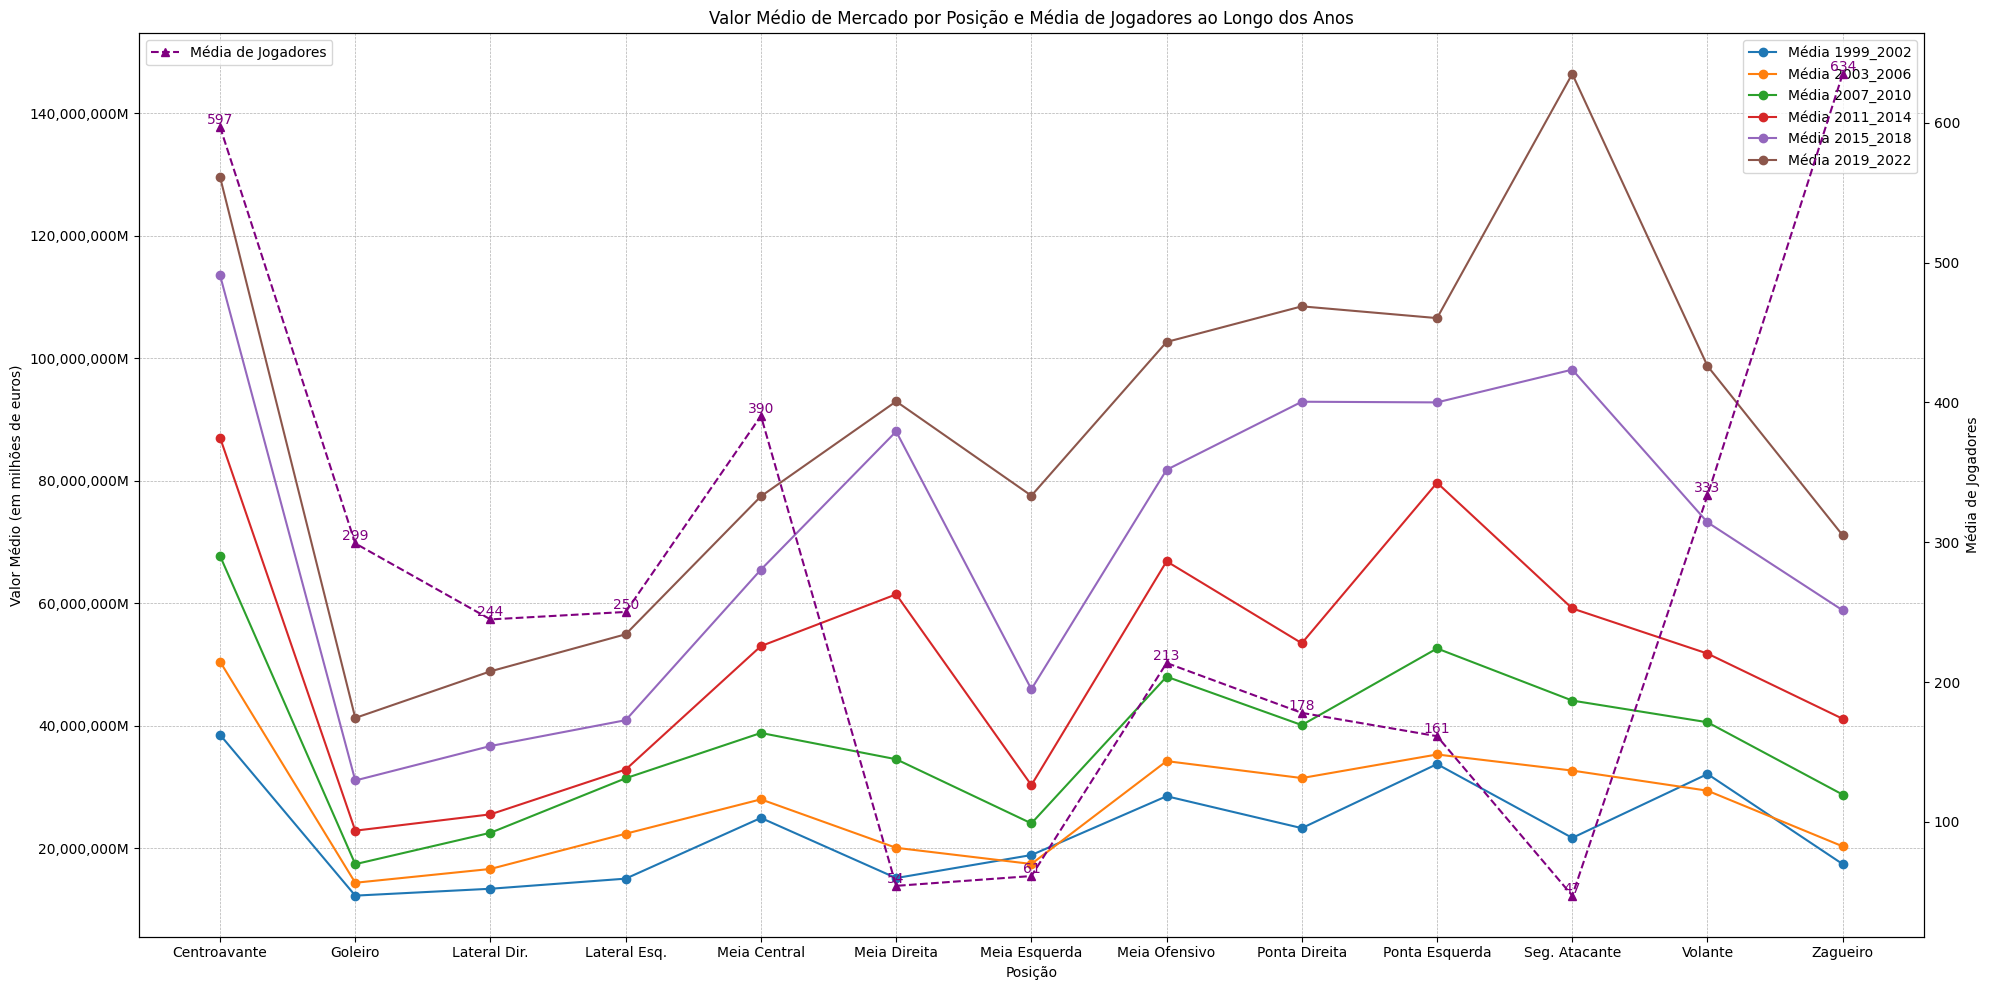

In [ ]:
# Lista das colunas relacionadas à quantidade de jogadores
qtd_jogadores_columns = [col for col in results.columns if 'Qtd_Jogadores' in col]

# Calcular a média dessas colunas e criar a coluna 'Media_Qtd_Jogadores'
results['Media_Qtd_Jogadores'] = results[qtd_jogadores_columns].mean(axis=1)

# Inicializar a figura e os dois eixos
fig, ax1 = plt.subplots(figsize=(20, 10))

# Plotar as curvas de valor médio no ax1
for period in periods:
    ax1.plot(results['Posicao'], results[f'Media_{period}'], label=f'Média {period}', marker='o')

# Configurações do ax1
ax1.set_title('Valor Médio de Mercado por Posição e Média de Jogadores ao Longo dos Anos')
ax1.set_xlabel('Posição')
ax1.set_ylabel('Valor Médio (em milhões de euros)')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
y_formatter = plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x)))
ax1.yaxis.set_major_formatter(y_formatter)
ax1.legend(loc='upper left')

# Criar o eixo secundário ax2 para a média de jogadores
ax2 = ax1.twinx()
ax2.plot(results['Posicao'], results['Media_Qtd_Jogadores'], label='Média de Jogadores', linestyle='--', marker='^', color='purple')
for x, y in zip(results["Posicao"], results["Media_Qtd_Jogadores"]):
    ax2.text(x, y, str(int(y)), color='purple', ha='center', va='bottom')
ax2.set_ylabel('Média de Jogadores')
ax2.legend(loc='upper left')
ax1.legend(loc='upper right')

plt.tight_layout()
plt.show()
